In diesem Notebook werden auf verschiedenen Modalitäten verschiedene Modelle trainiert, angewendet und ausgewertet. Jeweils: Random Forest, XGBoost, Logistic Regression, SVM, Neuronales Netz

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score

c:\Users\michi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\michi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\michi\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


# Vorbereitung: Data Split in 3 Datasets!

Preprocessing der Kategorsischen Variablen..

In [ ]:
df = pd.read_csv("features_enriched_tab_img_text.csv")
print(df.shape)
print(df.columns)

df = df.rename(
    columns={
        "stars": "tab_star",
        "year": "tab_year",
        "month": "tab_month",
        "day": "tab_day",
        "likesCount": "tab_likesCount",
        "reviewerNumberOfReviews": "tab_reviewerNumberOfReviews",
        "isLocalGuide": "tab_isLocalGuide",
        "dayofweek": "tab_dayofweek",
        "elapsed_days": "tab_elapsed_days",
        "when_on_day_4hbin": "tab_when_on_day_4hbin",
    }
)

df["label"] = df["label"].replace({"real": 0, "fake": 1})
df["text_sentiment"] = df["text_sentiment"].replace(
    {"negative": 0, "neutral": 1, "positive": 2}
)

df_num = df.select_dtypes(include=["float64", "int64"])
df_cat = df.select_dtypes(include=["object"])

df.to_csv("features_enriched_tab_img_text_preproc.csv", index=False)

In [ ]:
df = pd.read_csv("features_enriched_tab_img_text_preproc.csv")

print(df.shape)
print(df.columns)
print(df.filter(regex='text_'))

Train-Validation-Test-Split.

In [30]:
df = pd.read_csv('features_enriched_tab_img2_text_preproc.csv')
print(f"Orginal:\t{df.shape}")
print("---------------------------------------------------------------------------------------------")

train, test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=1)
train_val, test = train_test_split(df, test_size=0.2, stratify=df['label'], random_state=1)
train, val = train_test_split(train_val, test_size=0.2, stratify=train_val['label'], random_state=1)
print(f"Train:\t\t{train.shape}")
print(f"Validation:\t{val.shape}")
print(f"Test:\t\t{test.shape}")

train.to_csv('detection_train.csv', index=False)
val.to_csv('detection_val.csv', index=False)
test.to_csv('detection_test.csv', index=False)
train_val.to_csv('detection_train_val.csv', index=False)

Orginal:	(1408, 1086)
---------------------------------------------------------------------------------------------
Train:		(900, 1086)
Validation:	(226, 1086)
Test:		(282, 1086)


## Baseline mit Dummy-Klassifikator: Coinflip

In [31]:
from sklearn.dummy import DummyClassifier

train_df = pd.read_csv("detection_train.csv")
val_df = pd.read_csv("detection_val.csv")
test_df = pd.read_csv("detection_test.csv")


def apply_and_eval_dummy_on_val (used_features):
    X_train, y_train = train_df[used_features], train_df["label"]
    X_val, y_val = val_df[used_features], val_df["label"]
    dummy = DummyClassifier(strategy="uniform", random_state=1)
    dummy.fit(X_train, y_train)
    y_pred_val = dummy.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    confusion = confusion_matrix(y_val, y_pred_val)
    auc = roc_auc_score(y_val, y_pred_val)
    
    accuracy = "{:.4f}".format(accuracy)
    f1 = "{:.4f}".format(f1)
    precision = "{:.4f}".format(precision)
    recall = "{:.4f}".format(recall)
    auc = "{:.4f}".format(auc)
    print(f"VALIDATION: \naccuarcy:\t{accuracy}\nPrecision:\t{precision}\nRecall:\t\t{recall}\nAUC:\t\t{auc}\nConfusion matrix:\n{confusion}")
    #return accuracy_val, f1, precision, recall, confusion, auc

def apply_and_eval_dummy_classificator_on_test(used_features):
    X_train, y_train = train_df[used_features], train_df["label"]
    X_val, y_val = val_df[used_features], val_df["label"]
    X_test, y_test = test_df[used_features], test_df["label"]

    dummy = DummyClassifier(strategy="uniform", random_state=1)
    dummy.fit(X_train, y_train)
    y_pred_val = dummy.predict(X_val)
    y_pred_test = dummy.predict(X_test)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    confusion = confusion_matrix(y_test, y_pred_test)
    auc = roc_auc_score(y_test, y_pred_test)

    accuracy_val = "{:.4f}".format(accuracy_val)
    accuracy_test = "{:.4f}".format(accuracy_test)
    f1 = "{:.4f}".format(f1)
    precision = "{:.4f}".format(precision)
    recall = "{:.4f}".format(recall)
    auc = "{:.4f}".format(auc)
    print(f"acc_test:\t{accuracy_test}\nPrecision:\t{precision}\nRecall:\t\t{recall}\nAUC:\t\t{auc}\nConfusion matrix:\n{confusion}")
    #return  accuracy_test, f1, precision, recall, confusion, auc


used_features_img0 = train_df.filter(regex="^(feature)").columns
used_features_img2 = train_df.filter(regex="^(img_feature)").columns
used_features_tab = train_df.filter(regex="^(tab_)").columns
used_features_text = train_df.filter(regex="^(text_)").columns
used_features_all = train_df.filter(regex="^(feature|img_feature|tab_|text_)").columns


print(f"____________________________Test: EVALUATION_DUMMY_CLASSIFICATOR: Image Features_________________________________________________")
apply_and_eval_dummy_classificator_on_test(used_features_img0)


print(f"____________________________Test:EVALUATION_DUMMY_CLASSIFICATOR: Image (Url/2) Features_________________________________________________")
apply_and_eval_dummy_classificator_on_test(used_features_img2)


print(f"____________________________Test: EVALUATION_DUMMY_CLASSIFICATOR: tab Features_________________________________________________")
apply_and_eval_dummy_classificator_on_test(used_features_tab)


print(f"____________________________Test: EVALUATION_DUMMY_CLASSIFICATOR: text Features_________________________________________________")
apply_and_eval_dummy_classificator_on_test(used_features_text)


____________________________Test: EVALUATION_DUMMY_CLASSIFICATOR: Image Features_________________________________________________
acc_test:	0.4965
Precision:	0.4966
Recall:		0.5177
AUC:		0.4965
Confusion matrix:
[[67 74]
 [68 73]]
____________________________Test:EVALUATION_DUMMY_CLASSIFICATOR: Image (Url/2) Features_________________________________________________
acc_test:	0.4965
Precision:	0.4966
Recall:		0.5177
AUC:		0.4965
Confusion matrix:
[[67 74]
 [68 73]]
____________________________Test: EVALUATION_DUMMY_CLASSIFICATOR: tab Features_________________________________________________
acc_test:	0.4965
Precision:	0.4966
Recall:		0.5177
AUC:		0.4965
Confusion matrix:
[[67 74]
 [68 73]]
____________________________Test: EVALUATION_DUMMY_CLASSIFICATOR: text Features_________________________________________________
acc_test:	0.4965
Precision:	0.4966
Recall:		0.5177
AUC:		0.4965
Confusion matrix:
[[67 74]
 [68 73]]


# XGBoost

____________________________XGB ON TEST - ImageUrls/0 Features_________________________________________________
acc_test:	0.8865248226950354
Precision:	0.8811188811188811
Recall:		0.8936170212765957
F1-Score:	0.8928571428571428
AUC:		0.8865248226950355
Confusion matrix:
[[124  17]
 [ 15 126]]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


___________________________XGB ON TEST: ImageUrls/2 Features_________________________________________________
acc_test:	0.875886524822695
Precision:	0.863013698630137
Recall:		0.8936170212765957
F1-Score:	0.8947368421052632
AUC:		0.875886524822695
Confusion matrix:
[[121  20]
 [ 15 126]]


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


____________________________XGB ON TEST: tab Features_________________________________________________
acc_test:	0.7198581560283688
Precision:	0.7384615384615385
Recall:		0.6808510638297872
F1-Score:	0.7685589519650654
AUC:		0.7198581560283688
Confusion matrix:
[[107  34]
 [ 45  96]]


 98%|===================| 879/900 [00:20<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


____________________________XGB ON TEST: text Features_________________________________________________
acc_test:	0.5460992907801419
Precision:	0.5467625899280576
Recall:		0.5390070921985816
F1-Score:	0.5872340425531914
AUC:		0.5460992907801419
Confusion matrix:
[[78 63]
 [65 76]]


 99%|===================| 891/900 [00:19<00:00]        No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


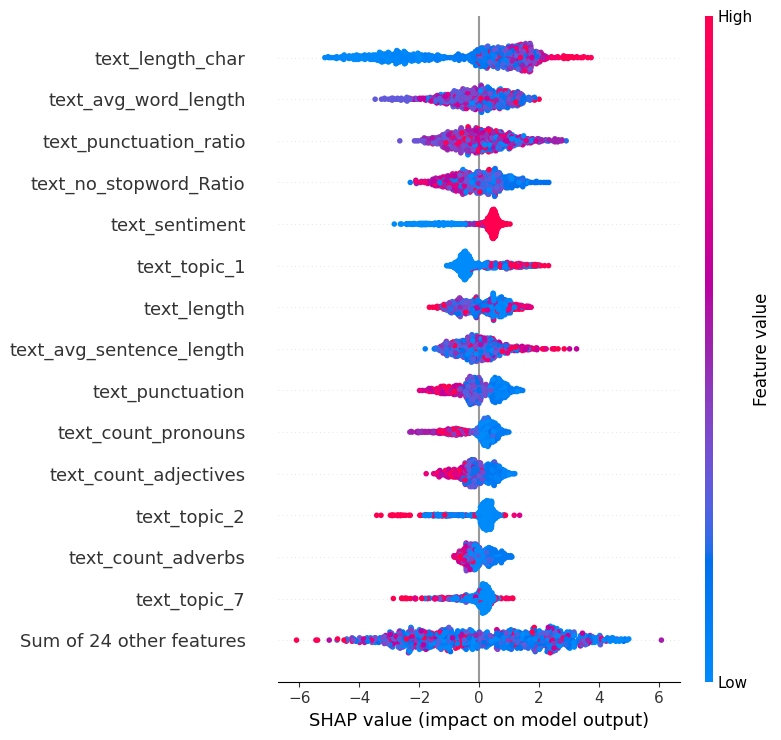

In [44]:
from xgboost import XGBClassifier
import shap
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("detection_train.csv")
val_df = pd.read_csv("detection_val.csv")
test_df = pd.read_csv("detection_test.csv")

def apply_and_eval_xgb_on_val(used_features, svg_file_suffix):
    plt.clf()
    X_train, y_train = train_df[used_features], train_df["label"]
    X_val, y_val = val_df[used_features], val_df["label"]
    
    # Standardization
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_val_std = scaler.transform(X_val)

    xgb = XGBClassifier(random_state=3, n_estimators=1000)
    xgb.fit(X_train_std, y_train)
    y_pred_val = xgb.predict(X_val_std)

    accuracy = accuracy_score(y_val, y_pred_val)
    f1 = f1_score(y_val, y_pred_val)
    precision = precision_score(y_val, y_pred_val)
    recall = recall_score(y_val, y_pred_val)
    confusion = confusion_matrix(y_val, y_pred_val)
    auc = roc_auc_score(y_val, y_pred_val)
    print(f"VALIDATION SET: \naccuracy:\t{accuracy}\nPrecision:\t{precision}\nRecall:\t\t{recall}\nF1-Score:\t{f1}\nAUC:\t\t{auc}\nConfusion matrix:\n{confusion}")

    explainer = shap.Explainer(xgb, X_train_std, feature_names=X_train.columns)
    shap_values = explainer(X_train_std)
    shap.plots.beeswarm(shap_values, max_display=15,show=False) 
    plt.tight_layout()
    plt.savefig(f'shap_xbg_test_{svg_file_suffix}.svg', format='svg', dpi=1200)
    #return  accuracy_test, f1, precision, recall, confusion, auc



def apply_and_eval_xgb_on_test(used_features, svg_file_suffix):
    plt.clf()
    X_train, y_train = train_df[used_features], train_df["label"]
    X_val, y_val = val_df[used_features], val_df["label"]
    X_test, y_test = test_df[used_features], test_df["label"]

    # Normalisierung
    # X_train_norm = (X_train - X_train.mean()) / X_train.std()
    # X_val_norm = (X_val - X_train.mean()) / X_train.std()
    # X_test_norm = (X_test - X_train.mean()) / X_train.std()
    
    # Standardization
    scaler = StandardScaler()
    X_train_std = scaler.fit_transform(X_train)
    X_val_std = scaler.transform(X_val)
    X_test_std = scaler.transform(X_test)

    xgb = XGBClassifier(random_state=3, n_estimators=1000)
    xgb.fit(X_train_std, y_train)
    y_pred_val = xgb.predict(X_val_std)
    y_pred_test = xgb.predict(X_test_std)

    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_val, y_pred_val)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    confusion = confusion_matrix(y_test, y_pred_test)
    auc = roc_auc_score(y_test, y_pred_test)
    print(f"acc_test:\t{accuracy_test}\nPrecision:\t{precision}\nRecall:\t\t{recall}\nF1-Score:\t{f1}\nAUC:\t\t{auc}\nConfusion matrix:\n{confusion}")

    explainer = shap.Explainer(xgb, X_train_std, feature_names=X_train.columns)
    shap_values = explainer(X_train_std)
    shap.plots.beeswarm(shap_values, max_display=15,show=False) 
    plt.tight_layout()
    plt.savefig(f'shap_xbg_test_{svg_file_suffix}.svg', format='svg', dpi=1200)
    #return  accuracy_test, f1, precision, recall, confusion, auc


used_features_img0 = train_df.filter(regex="^(feature)").columns
used_features_img2 = train_df.filter(regex="^(img_feature)").columns
used_features_tab = train_df.filter(regex="^(tab_)").columns
used_features_text = train_df.filter(regex="^(text_)").columns
used_features_all = train_df.filter(regex="^(feature|img_feature|tab_|text_)").columns


print(f"____________________________XGB ON TEST - ImageUrls/0 Features_________________________________________________")
apply_and_eval_xgb_on_test(used_features_img0, "img0")

print(f"___________________________XGB ON TEST: ImageUrls/2 Features_________________________________________________")
apply_and_eval_xgb_on_test(used_features_img2, "img2")


print(f"____________________________XGB ON TEST: tab Features_________________________________________________")
apply_and_eval_xgb_on_test(used_features_tab, "tab")


print(f"____________________________XGB ON TEST: text Features_________________________________________________")
apply_and_eval_xgb_on_test(used_features_text, "text")

TabNet

# TabNet - Neuronales Netz für Tabulare Daten

In [26]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import shap
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("detection_train.csv")
val_df = pd.read_csv("detection_val.csv")
test_df = pd.read_csv("detection_test.csv")


def train_and_tune_tabNet(used_features, svg_file_suffix):
    plt.clf()
    X_train, y_train = train_df[used_features], train_df["label"]
    X_val, y_val = val_df[used_features], val_df["label"]

    X_train = torch.tensor(X_train.to_numpy())
    y_train = torch.tensor(y_train.to_numpy())
    X_val = torch.tensor(X_val.to_numpy())
    y_val = torch.tensor(y_val.to_numpy())

    
    classifier = TabNetClassifier(verbose=0,seed=42)
    classifier.fit(X_train=X_train, y_train=y_train,
                patience=5,max_epochs=100,
                eval_metric=['auc'])



    # tabnet = TabNetClassifier(    )
    # tabnet.fit(X_train=X_train.values, y_train=y_train.values,
    # eval_set=[(X_val.values, y_val.values)],
    # max_epochs=10,
    # batch_size=1024,
    # virtual_batch_size=128,
    # num_workers=0,
    # eval_metric=['auc']
    # )
    # return tabnet


used_features_img0 = train_df.filter(regex="^(feature)").columns
used_features_img2 = train_df.filter(regex="^(img_feature)").columns
used_features_tab = train_df.filter(regex="^(tab_)").columns
used_features_text = train_df.filter(regex="^(text_)").columns
used_features_all = train_df.filter(regex="^(feature|img_feature|tab_|text_)").columns


print(
    f"____________________________XGB ON TEST - ImageUrls/0 Features_________________________________________________"
)
train_and_tune_tabNet(used_features_tab, "img0")



____________________________XGB ON TEST - ImageUrls/0 Features_________________________________________________


No early stopping will be performed, last training weights will be used.


TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found object

<Figure size 640x480 with 0 Axes>

# Random Forests